# Feuille de calcul grâce à l'outil Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1 : l’ACP

In [3]:
Matrice = np.mat(np.loadtxt("datas1.2.csv", delimiter=";",dtype=str)) #matrice contenant toutes les informations
Variable = np.mat(Matrice[0,:]) #matrice contenant le nom de chacune des variables dans l'ordre

XX = np.mat(Matrice[1:,:],dtype=str) #matrice contenant l'ensemble des résultats (en caractères)

In [4]:
Ai_score=XX[:,0:10]
Res=XX[:,10]
Age=XX[:,11]
Genre=XX[:,12]
Jaunisse=XX[:,13]
Appli=XX[:,14]
Pays=XX[:,15]
Ethnique=XX[:,16]
Parente=XX[:,17]
Autisme=XX[:,18]
AppliAutisme=XX[:,19]

Je remplace les "?" par la moyenne

In [5]:
for i in range(len(Age)):
    if (Age[i]=='?'):
        Age[i]='29'   #la moyenne est égale à 29,165...
XX[:,11]=Age

Pour faire une acp, on ne garde que les variables quantitatives

In [27]:
VariableX = np.mat(np.concatenate((Matrice[0,:15],Matrice[0,18:20]),axis=1))
X = np.array(np.concatenate((XX[:,:15],XX[:,18:20]),axis=1),dtype=int) #on met les valeurs en integer
n, p = X.shape
VariableX

matrix([['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
         'result', 'Age', 'Genre', 'Né', 'Déjà', 'Austime', 'Appli']],
       dtype='<U25')

In [7]:
m = np.sum(X,axis=0)/n                  #moyenne
s = np.sqrt(np.sum((X-m)**2,axis=0)/n)  #écart type

Centrer et réduire

In [8]:
Xn = (X - m) / s #print(np.mean(Xn),np.std(Xn)) = 0,1

Visualisation de la matrice de covariance entre les variables

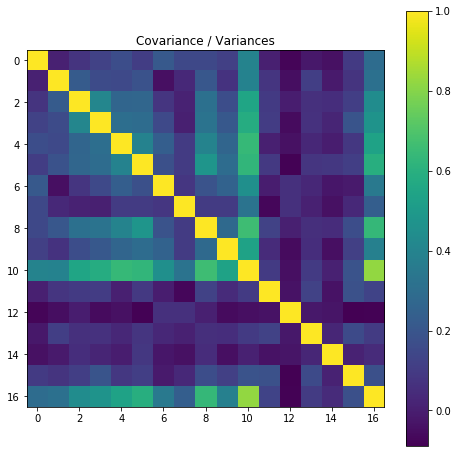

In [9]:
C = Xn.T @ Xn
plt.figure(figsize=(8,8))
plt.imshow(C/n)
plt.colorbar()
plt.title("Covariance / Variances")
plt.show()

--> on voit bien la dépendance de la variable 10 avec la 16ème.
    En effet, l'algorithme de l'application répond positif si le score est supéerieur ou égale à 7.
    On voit également la dépence des 10 premières questions sur le résultat, qui est simplement la somme.
    Il y a encore plein de chose à voir, j'en parlerai demain

Calcul des valeurs et vecteurs propres

In [10]:
vals, V = np.linalg.eig(C)
vals

array([ 3.29074436e+03, -2.54633195e-13,  1.00947280e+03,  1.70449668e+02,
        8.14486089e+02,  3.52512015e+02,  3.93828347e+02,  4.18765637e+02,
        4.57960186e+02,  7.48644291e+02,  5.13241308e+02,  5.23469839e+02,
        5.90962302e+02,  6.51436504e+02,  6.11404637e+02,  7.12729385e+02,
        7.07892631e+02])

La 2ème valeur propre est 0, c'est inutile. Je la mets en dernière position. Ainsi que la 4ème variable, car elle est négligeable face aux autres.

In [11]:
vals=np.concatenate((vals,np.array([vals[3]])),axis=0)
vals=np.concatenate((vals,np.array([0])),axis=0)
vals=np.delete(vals,3,0)
vals=np.delete(vals,1,0)

V=np.concatenate((V,np.array([V[3]])),axis=0)
V=np.concatenate((V,np.array([V[1]])),axis=0)
V=np.delete(V,3,0)
V=np.delete(V,1,0)

vals

array([3290.74436138, 1009.47279887,  814.48608903,  352.51201525,
        393.82834659,  418.76563703,  457.96018642,  748.64429127,
        513.24130836,  523.46983898,  590.96230229,  651.43650359,
        611.40463731,  712.72938525,  707.89263071,  170.44966768,
          0.        ])

In [17]:
U = Xn@V
v = V[:,0:3]  #deux premiers vecteurs propres
u = U[:,:3]
E = Xn - u@(v.T) # np.sum(E**2)-np.sum(vals[2:p]) = 0

In [18]:
vpc = 100 * np.cumsum(vals) / np.sum(vals) 
print(vals)
print("Les trois premières valeurs propres représentent ",int(round(vpc[2])),"% de l'information")

[3290.74436138 1009.47279887  814.48608903  352.51201525  393.82834659
  418.76563703  457.96018642  748.64429127  513.24130836  523.46983898
  590.96230229  651.43650359  611.40463731  712.72938525  707.89263071
  170.44966768    0.        ]
Les trois premières valeurs propres représentent  43 % de l'information


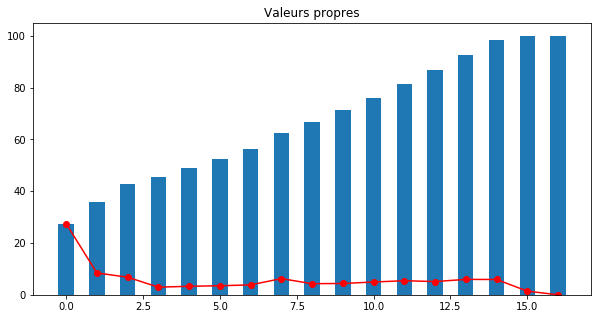

In [19]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(p), vpc, 0.5)
plt.plot(100*vals/ np.sum(vals), 'r-o')
plt.title("Valeurs propres")
plt.show()

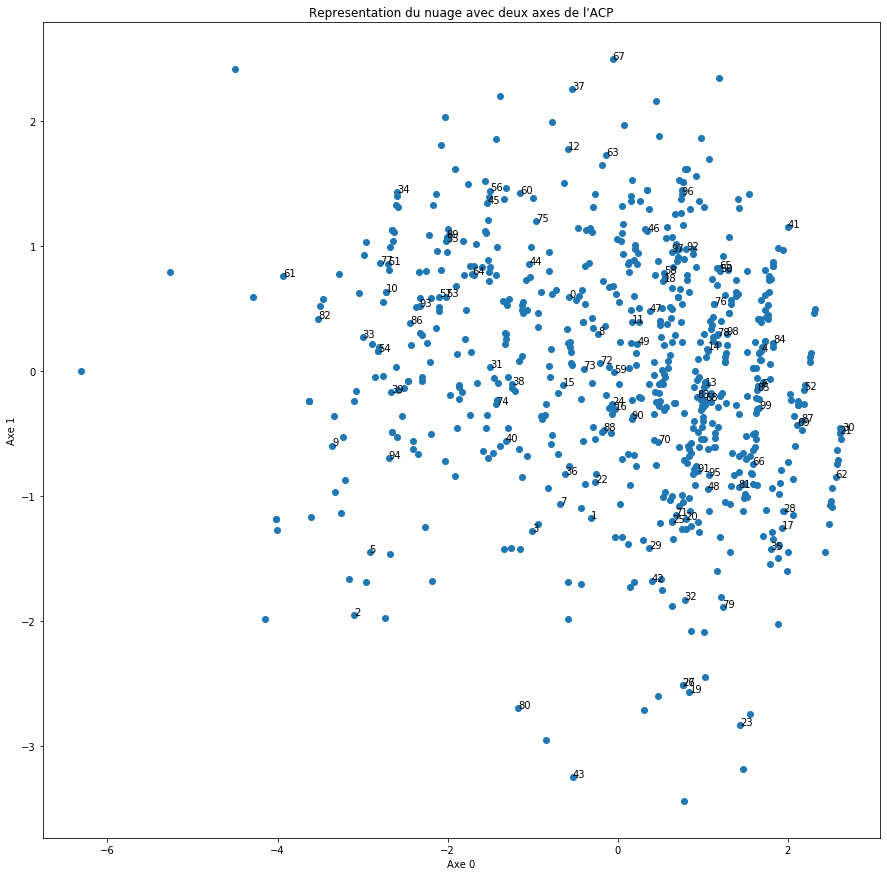

In [22]:
plt.figure(figsize=(15, 15))
plt.title("Representation du nuage avec deux axes de l'ACP")
plt.plot(u[:, 0], u[:, 2], 'o')
for i in range(n):
    if(i<100):
        plt.text(u[i, 0], u[i, 2], i)
plt.xlabel("Axe 0")
plt.ylabel("Axe 1")
plt.show()

In [16]:
D=np.diag(vals)
Vn = V@np.sqrt(D) / np.sqrt(n)

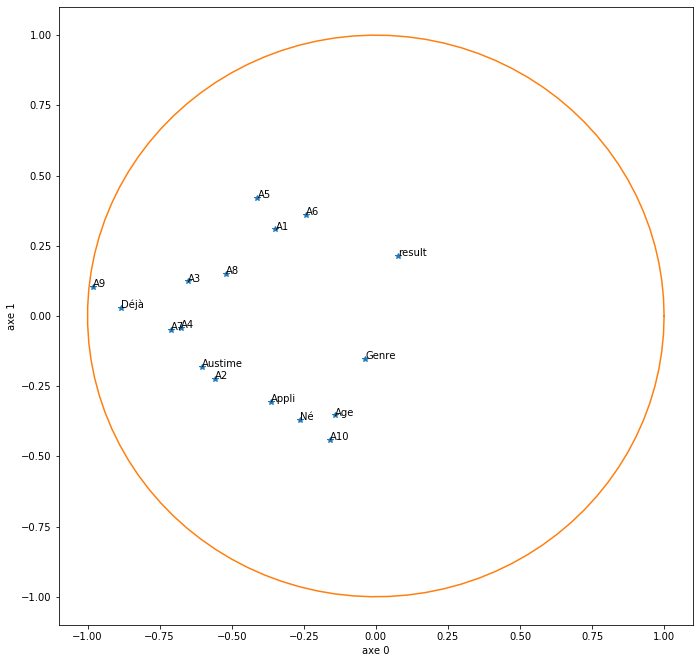

In [23]:
plt.figure(figsize=(25, 25))
a = np.linspace(0, 2*np.pi, 100)

plt.subplot(2,2,1)
plt.plot(Vn[:, 0], Vn[:, 2],'*')

for i in range(p):
    plt.text(Vn[i, 0], Vn[i, 2],VariableX[0,i])

plt.plot(np.cos(a),np.sin(a),'-')
plt.xlabel('axe 0')
plt.ylabel('axe 1')

plt.show()

--> Il faut zoomer

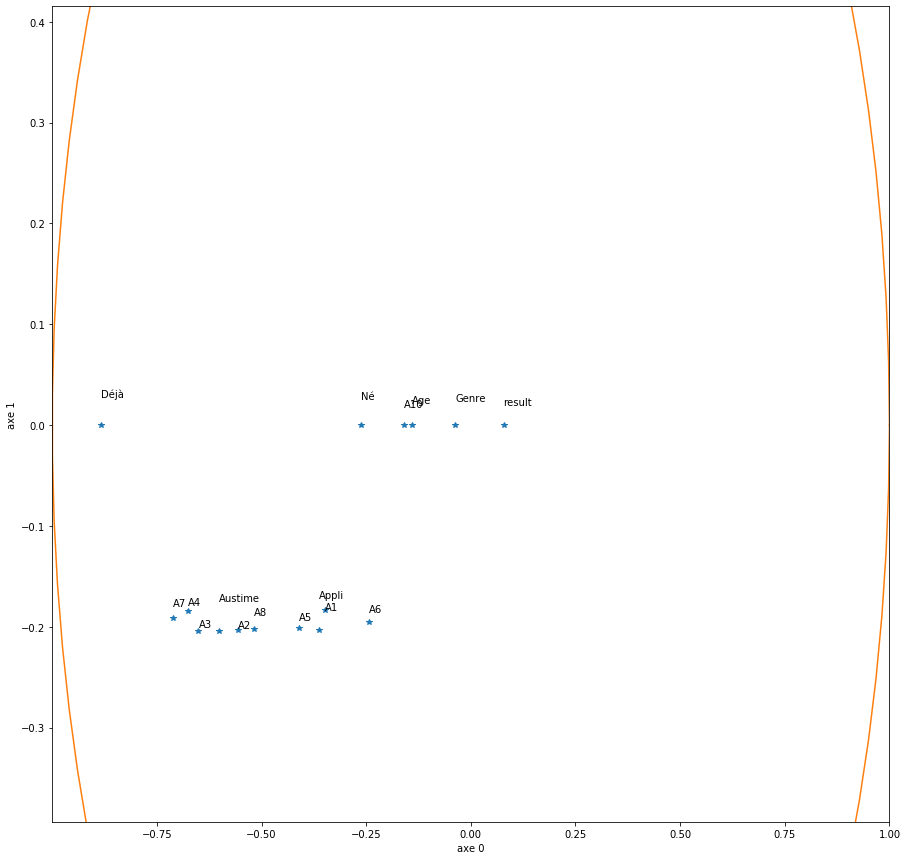

In [18]:
plt.figure(figsize=(15,15))
a = np.linspace(0, 2*np.pi, 100)

ax3 = plt.subplot(111)
plt.axis=([-1,0.25,-0.5,0.25])
ax3.margins(x=0, y=-0.3)   # Values in (-0.5, 0.0) zooms in to center
plt.plot(Vn[:, 0], Vn[:, 1],'*')

for i in range(p):
    if(i!=8):    #car A9_score est abbérant
        plt.text(Vn[i, 0], Vn[i, 1]+i/500,VariableX[0,i])

plt.plot(np.cos(a),np.sin(a),'-')
plt.xlabel('axe 0')
plt.ylabel('axe 1')
plt.show()